In [11]:
import importlib
import pandas as pd
import json
import sys
import matplotlib.pyplot as plt

sys.path.insert(1, '/home/maciek/Documents/Magisterka/kubernetes-anomaly-detector')
print(sys.path)

import kad.kad_utils.kad_utils as kad_utils


kad_utils.customize_matplotlib_for_paper()

['/home/maciek/Documents/Magisterka/kubernetes-anomaly-detector/notebooks', '/home/maciek/Documents/Magisterka/kubernetes-anomaly-detector', '/home/maciek/Documents/Magisterka/kubernetes-anomaly-detector', '/home/maciek/Documents/Magisterka/kubernetes-anomaly-detector', '/usr/lib/python38.zip', '/usr/lib/python3.8', '/usr/lib/python3.8/lib-dynload', '', '/home/maciek/Documents/Magisterka/kubernetes-anomaly-detector/venv/lib/python3.8/site-packages', '/home/maciek/Documents/Magisterka/kubernetes-anomaly-detector/venv/lib/python3.8/site-packages/IPython/extensions', '/home/maciek/.ipython', '/snap/pycharm-professional/252/plugins/python/helpers/pydev', '/snap/pycharm-professional/252/plugins/python/helpers-pro/jupyter_debug']


In [12]:
SARIMA_KEY: str = "SARIMA"
AUTOENCODER_KEY: str = "autoencoder"
ACC_KEY: str = "accuracy"
PREC_KEY: str = "precision"
RECALL_KEY: str = "recall"

CUSTOM_KEY: str = "total"
CUSTOM_ACC_KEY: str = "accuracy component"
CUSTOM_COLL_KEY: str = "collective component"
CUSTOM_PREC_KEY: str = "precision component"

In [13]:
with open("eval.json") as f:
    eval_dict = json.load(f)

In [22]:
def reorder_dictionary(p_eval_dict: dict):
    reordered_eval_dict = {}

    for k_file, v_file in p_eval_dict.items():
        for k_algo, v_algo in v_file.items():
            for algo_item in v_algo:
                for k_metric, v_metric in algo_item.items():
                    if k_file not in reordered_eval_dict:
                        reordered_eval_dict[k_file] = {}
                    if k_algo not in reordered_eval_dict[k_file]:
                        reordered_eval_dict[k_file][k_algo] = {}
                    if k_metric not in reordered_eval_dict[k_file][k_algo]:
                        reordered_eval_dict[k_file][k_algo][k_metric] = []
                    reordered_eval_dict[k_file][k_algo][k_metric].append(v_metric)

    return reordered_eval_dict

<ipython-input-35-f68446f0c809>:17: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "type" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(k_file + ".png", type="PNG")


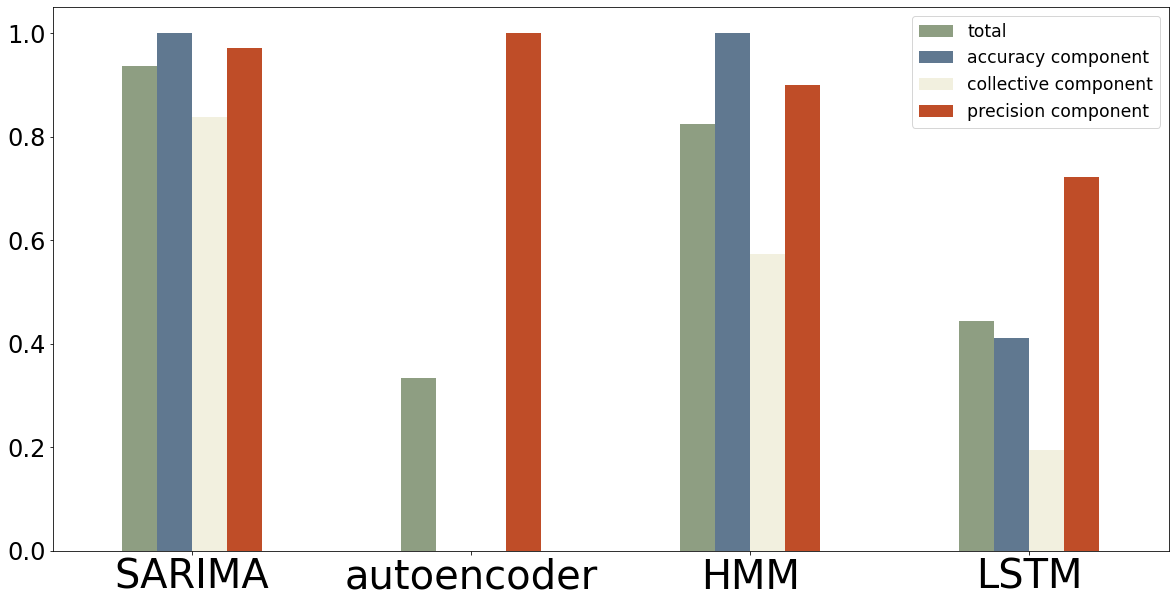

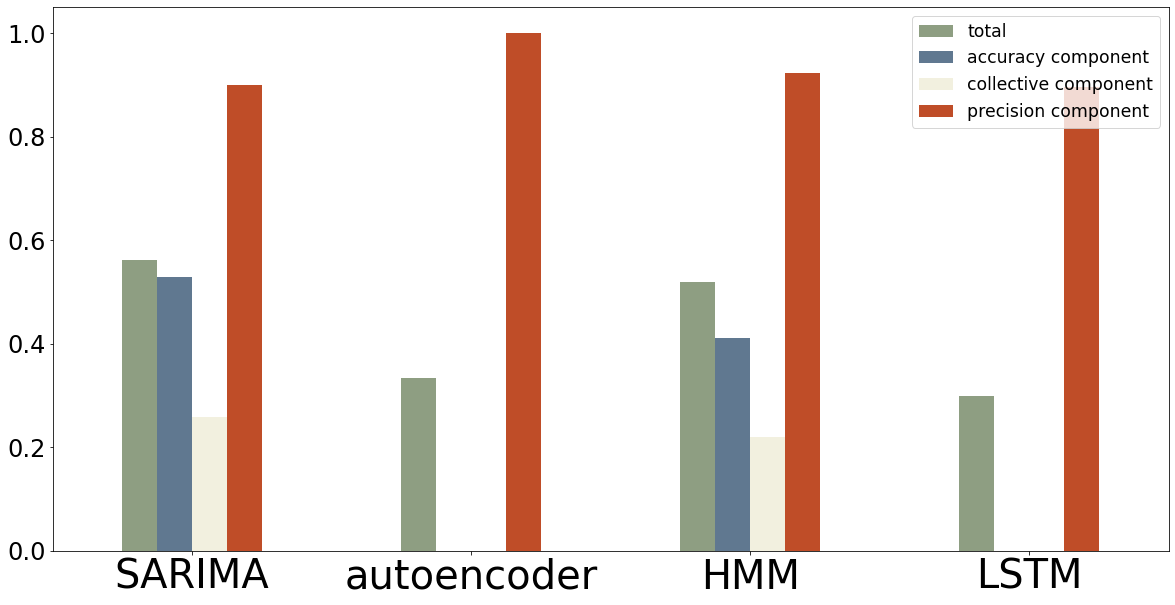

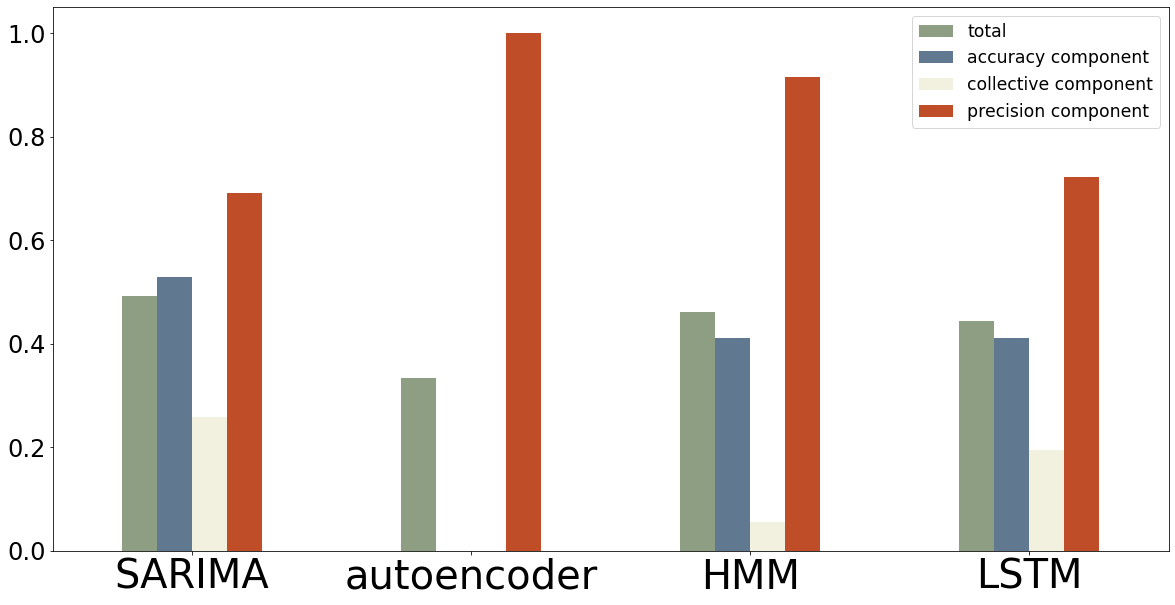

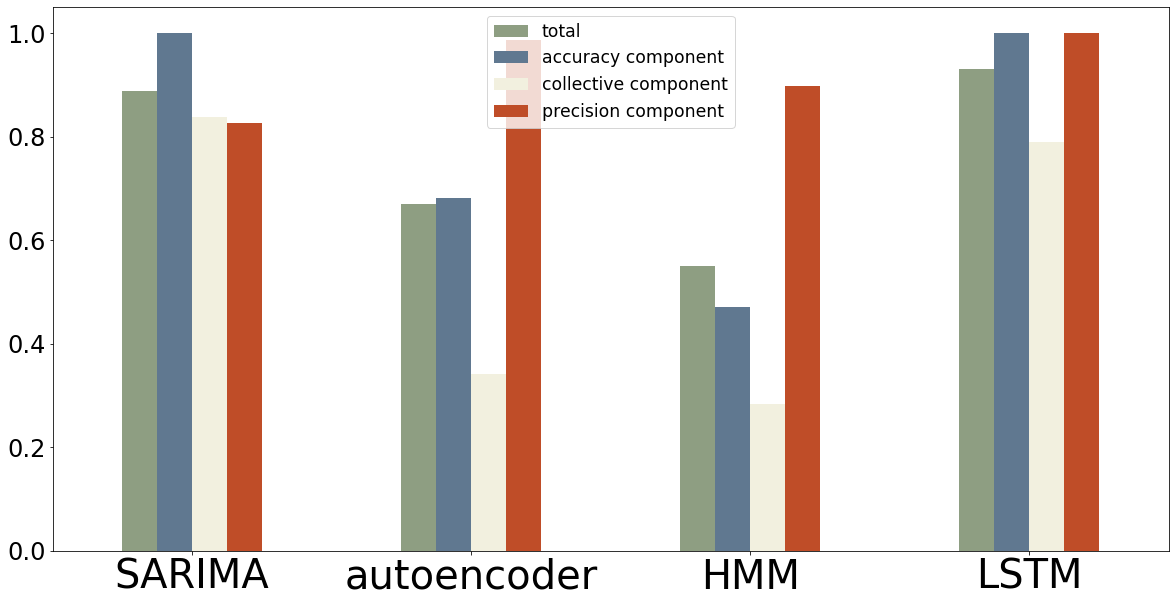

In [35]:
import numpy as np

reordered_dictionary = reorder_dictionary(eval_dict)

for k_file, v_file in reordered_dictionary.items():
    fig = plt.figure()
    ax = fig.add_subplot(111)
    fig.set_size_inches(20, 10)

    eval_df = pd.DataFrame.from_dict(v_file)
    eval_df = eval_df.applymap(np.mean)
    eval_df.T.plot.bar(ax=ax, color=["#8e9e82", "#607890", "#f2f0df", "#bf4d28"])
    # fig.suptitle(k_file, fontsize=40, color="black")
    plt.xticks(fontsize=40, rotation="horizontal")
    plt.ylim([0.0, 1.05])
    # plt.show()
    plt.savefig(k_file + ".png", type="PNG")
    print("\n\n\n")


In [27]:
eval_dict

{'art_daily_flatmiddle.csv': {'SARIMA': [{'total': 0.9362241911268624,
    'accuracy component': 1.0,
    'collective component': 0.8370580932487933,
    'precision component': 0.9716144801317935}],
  'autoencoder': [{'total': 0.3333333333333333,
    'accuracy component': 0.0,
    'collective component': 0.0,
    'precision component': 1.0}],
  'HMM': [{'total': 0.823830581364486,
    'accuracy component': 1.0,
    'collective component': 0.5725603473609202,
    'precision component': 0.8989313967325377}],
  'LSTM': [{'total': 0.4431042417903536,
    'accuracy component': 0.4117647058823529,
    'collective component': 0.19499298738618995,
    'precision component': 0.7225550321025178}]},
 'art_daily_jumpsdown.csv': {'SARIMA': [{'total': 0.5626537941734536,
    'accuracy component': 0.5294117647058824,
    'collective component': 0.2591827023619956,
    'precision component': 0.8993669154524829}],
  'autoencoder': [{'total': 0.3333333333333333,
    'accuracy component': 0.0,
    'colle

In [29]:
reordered_dictionary

{'art_daily_flatmiddle.csv': {'SARIMA': {'total': [0.9362241911268624],
   'accuracy component': [1.0],
   'collective component': [0.8370580932487933],
   'precision component': [0.9716144801317935]},
  'autoencoder': {'total': [0.3333333333333333],
   'accuracy component': [0.0],
   'collective component': [0.0],
   'precision component': [1.0]},
  'HMM': {'total': [0.823830581364486],
   'accuracy component': [1.0],
   'collective component': [0.5725603473609202],
   'precision component': [0.8989313967325377]},
  'LSTM': {'total': [0.4431042417903536],
   'accuracy component': [0.4117647058823529],
   'collective component': [0.19499298738618995],
   'precision component': [0.7225550321025178]}},
 'art_daily_jumpsdown.csv': {'SARIMA': {'total': [0.5626537941734536],
   'accuracy component': [0.5294117647058824],
   'collective component': [0.2591827023619956],
   'precision component': [0.8993669154524829]},
  'autoencoder': {'total': [0.3333333333333333],
   'accuracy component': 